<a href="https://colab.research.google.com/github/entelecheia/ekorpkit-config/blob/main/notebooks/sentiment/financial_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

## Instantiating a sentiment analyser class

In [19]:
%%capture
%pip install ekorpkit[model,tokenize]

In [1]:
from ekorpkit import eKonf

config_group='model/sentiment=lm'
model_cfg = eKonf.compose(config_group=config_group)
model_cfg.preprocessor.tokenizer.nltk.lemmatize = True

In [3]:
cfg = eKonf.compose(config_group='pipeline=pipeline')
cfg.verbose = True
cfg.data_dir = '../data/edgar'
cfg.data_file = 'edgar.parquet'
cfg._pipeline_ = ['summary_stats', 'predict']
cfg.summary_stats.output_file = 'edgar_stats.yaml'
cfg.predict.model = model_cfg
cfg.predict.output_file = 'edgar_sentiments_lm.parquet'
cfg.num_workers = 100
df = eKonf.instantiate(cfg)

apply len_bytes to num_bytes: 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]


{'human_bytes': '30.02 MiB',
 'num_bytes': 31478913,
 'num_bytes_max': 658159,
 'num_bytes_median': 3367.0,
 'num_bytes_min': 301,
 'num_examples': 1585}


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Predicting [text]: 100%|██████████| 100/100 [00:31<00:00,  3.14it/s]


 >> saved dataframe to /root/.ekorpkit/projects/_default_/outputs/pipeline/edgar_sentiments_lm.parquet
              id                                         filename     item  \
1286111  2666977    2009/70858_10K_2009_0001193125-10-041666.json  item_10   
1287645  2668725  2009/1018724_10K_2009_0001193125-10-016098.json  item_10   
1287674  2668756   2009/320193_10K_2009_0001193125-09-214859.json  item_10   
1288215  2669377    2009/80424_10K_2009_0001193125-09-175986.json  item_10   
1291201  2672797    2009/21344_10K_2009_0001047469-10-001476.json  item_10   

                                                      text      cik  \
1286111  Item 10. \nDirectors, Executive Officers and C...    70858   
1287645  Item 10. \nDirectors, Executive Officers and C...  1018724   
1287674  Item 10. \nDirectors, Executive Officers and C...   320193   
1288215  Item 10. \nDirectors, Executive Officers and C...    80424   
1291201  ITEM 10. \nDIRECTORS, EXECUTIVE OFFICERS AND C...    21344   

 

In [4]:
cfg.predict.output_dir

'/root/.ekorpkit/projects/_default_/outputs/pipeline'

In [2]:
ds_cfg = eKonf.compose(config_group='corpus=dataset')
ds_cfg.name = 'financial_phrasebank'
ds_cfg.data_dir = '../data'

cfg = eKonf.compose(config_group='pipeline=pipeline')
# cfg.verbose = True
cfg.corpus = ds_cfg
cfg._pipeline_ = ['subset', 'predict']
cfg.subset.sample_n = 10
cfg.predict.model = model_cfg
cfg.predict.output_file = f'{ds_cfg.name}.parquet'
cfg.num_workers = 1
df = eKonf.instantiate(cfg)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Predicting [text]:   0%|          | 0/10 [00:00<?, ?it/s]

,id,labels,text,polarity,subjectivity,polarity_label,uncertainty
655,643,neutral,`` Our aim is to understand different traffic ...,0.000000,0.000000,neutral,0.0
85,1083,neutral,The Internal Revenue Service sees about 20 per...,0.000000,0.000000,neutral,0.0
388,608,neutral,The company specialises in temporary electrifi...,0.000000,0.000000,neutral,0.0
569,1880,negative,Loss for the period totalled EUR 15.6 mn compa...,-0.999999,0.052632,negative,0.0
535,1269,neutral,"ISMS does not disclose its financial results ,...",-0.999999,0.083333,negative,0.0
326,296,positive,Kalnapilio-Tauro Grupe ( Kalnapilis-Tauras Gro...,0.000000,0.000000,neutral,0.0
330,713,neutral,"The total scope of the project is about 38,000...",0.000000,0.000000,neutral,0.0
772,843,positive,Re-use back into PET bottles has also steadily...,0.000000,0.000000,neutral,0.0
37,86,positive,"At the end of March 2007 , the group 's order ...",0.000000,0.000000,neutral,0.0
641,526,neutral,You need to be ready when the window opens up ...,0.000000,0.000000,neutral,0.0


In [2]:
ds_cfg = eKonf.compose(config_group='dataset=dataset')
ds_cfg.name = 'financial_phrasebank'
ds_cfg.data_dir = '../data'

cfg = eKonf.compose(config_group='pipeline=pipeline')
# cfg.verbose = True
cfg.dataset = ds_cfg
cfg._pipeline_ = ['subset', 'predict']
# cfg.subset.sample_n = 5
cfg.predict.model = model_cfg
cfg.predict.output_dir = "../data/predict"
cfg.predict.output_file = f'{ds_cfg.name}.parquet'
cfg.num_workers = 1
df = eKonf.instantiate(cfg)
df

Must specify one of head_n, tail_n, sample_n, sample_frac
Must specify one of head_n, tail_n, sample_n, sample_frac
Must specify one of head_n, tail_n, sample_n, sample_frac
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Predicting [text]:   0%|          | 0/1445 [00:00<?, ?it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Predicting [text]:   0%|          | 0/452 [00:00<?, ?it/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Predicting [text]:   0%|          | 0/362 [00:00<?, ?it/s]

{'train':         id    labels                                               text  \
 0      655   neutral  Customers in a wide range of industries use ou...   
 1      634   neutral  The writing and publication of Lemmink+ñinen -...   
 2     1030   neutral  Sullivan said some of the boards `` really inv...   
 3      317  positive  The six breweries recorded a 5.2 percent growt...   
 4      868  positive  In the second quarter of 2010 , the company 's...   
 ...    ...       ...                                                ...   
 1440   136  positive  In the fourth quarter of 2009 , Orion 's net p...   
 1441  2170  negative  Profit for the period totalled EUR 1.1 mn , do...   
 1442   344  positive  The diluted loss per share narrowed to EUR 0.2...   
 1443   573   neutral  LKAB , headquartered in Lulea , Sweden , is a ...   
 1444  1768   neutral  The EBRD is using its own funds to provide a 2...   
 
       split  polarity  subjectivity polarity_label  uncertainty  
 0     tra

In [3]:
print(cfg.predict.output_dir)
print(cfg.predict.output_file)

../data/predict
financial_phrasebank.parquet


Accuracy:  0.6418769366976538
Precison:  0.6332357082536276
Recall:  0.6418769366976538
F1 Score:  0.5976583790508804
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.38      0.36      0.37       303
     neutral       0.68      0.89      0.77      1386
    positive       0.65      0.19      0.29       570

    accuracy                           0.64      2259
   macro avg       0.57      0.48      0.48      2259
weighted avg       0.63      0.64      0.60      2259



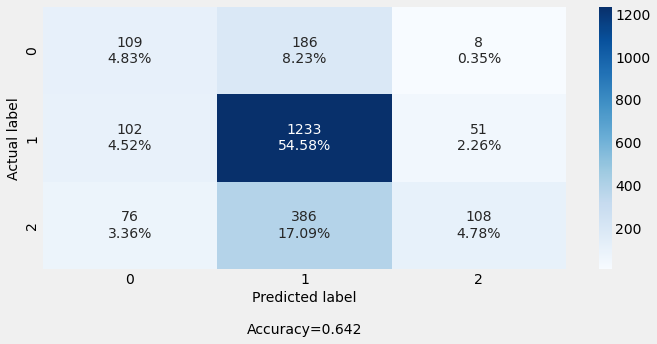

In [4]:
eval_cfg = eKonf.compose(config_group='model/eval=classification')
eval_cfg.column_info.actual = 'labels'
eval_cfg.column_info.predicted = 'polarity_label'
eval_cfg.data_dir = '../data/predict'
eval_cfg.data_file = 'financial_phrasebank-*.parquet'
eval_cfg.output_dir = '../data/eval'
# eval_cfg.method.average = None
eKonf.instantiate(eval_cfg)

In [10]:
eKonf.pprint(eval_cfg)

{'_target_': 'ekorpkit.models.eval.eval_classification',
 'column_info': {'actual': 'labels', 'predicted': 'polarity_label'},
 'data': None,
 'data_dir': '../data/predict',
 'data_file': 'financial_phrasebank.parquet',
 'method': {'_partial_': True,
            '_target_': 'ekorpkit.models.metrics.evaluate_classification_performance',
            'average': 'weighted'},
 'output_dir': '../data/eval',
 'output_file': 'confusion_matrix.png',
 'pipeline': {'data_dir': '../data/predict',
              'data_file': 'financial_phrasebank.parquet',
              'load_dataframe': {'data_dir': '../data/predict',
                                 'data_file': 'financial_phrasebank.parquet',
                                 'filepath': None,
                                 'filetype': None,
                                 'method': {'_partial_': True,
                                            '_target_': 'ekorpkit.pipelines.pipe._load_dataframe'},
                                 'verbose': T